In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

CARGAR EL DATASET

In [2]:
data = pd.read_excel("IA_3.xlsx")
print("Tamaño del dataset:", data.shape)
print(data.head())


print("\nConteo EMBARAZO (0=no, 1=sí, 2=posible):")
print(data["EMBARAZO"].value_counts(dropna=False))

Tamaño del dataset: (1000, 7)
   EDAD  CICLO_REGULAR  USO_ANTICONCEPTIVOS  RELACIONES_ACTIVAS  EMBARAZO  \
0    21              1                    0                   0         0   
1    34              0                    0                   0         0   
2    43              1                    1                   0         0   
3    29              0                    0                   1         2   
4    25              1                    0                   0         0   

        PC1       PC2  
0  0.958342  1.798566  
1  0.690100  0.529843  
2 -0.391584  0.181102  
3 -0.193263 -0.226597  
4  0.661702  1.765470  

Conteo EMBARAZO (0=no, 1=sí, 2=posible):
EMBARAZO
0    506
2    266
1    228
Name: count, dtype: int64


SELECCIONAR VARIABLES INDEPENDIENTES


In [3]:
X = data[["EDAD", "CICLO_REGULAR", "USO_ANTICONCEPTIVOS", "RELACIONES_ACTIVAS"]]


ESCALAR DATOS

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

APLICAR MODELO DE CLUSTERING

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
data["CLUSTER"] = clusters

print("\nConteo por cluster:")
print(data["CLUSTER"].value_counts())


Conteo por cluster:
CLUSTER
2    416
1    318
0    266
Name: count, dtype: int64


VISUALIZACIÓN

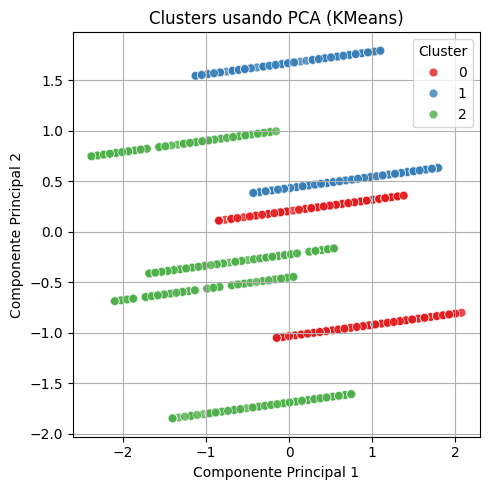

In [6]:
pca = PCA(n_components=2, random_state=42)
componentes = pca.fit_transform(X_scaled)

data["PC1"] = componentes[:, 0]
data["PC2"] = componentes[:, 1]

plt.figure(figsize=(5,5))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="CLUSTER",
    palette="Set1",
    data=data,
    s=40,
    alpha=0.8
)
plt.title("Clusters usando PCA (KMeans)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


HEATMAP EMBARAZO vs CLUSTER



Crosstab EMBARAZO vs CLUSTER:
 CLUSTER     0    1    2
EMBARAZO               
0           0  176  330
1           0  142   86
2         266    0    0


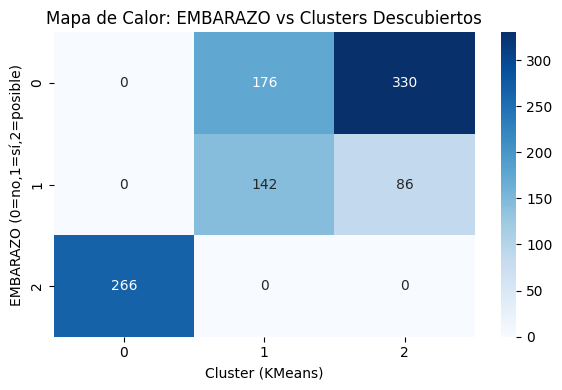

In [7]:
ct = pd.crosstab(data["EMBARAZO"], data["CLUSTER"])
print("\nCrosstab EMBARAZO vs CLUSTER:\n", ct)

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Cluster (KMeans)")
plt.ylabel("EMBARAZO (0=no,1=sí,2=posible)")
plt.title("Mapa de Calor: EMBARAZO vs Clusters Descubiertos")
plt.tight_layout()
plt.show()

ESTADÍSTICAS DESCRIPTIVAS POR CLUSTER

In [8]:

print("\nPromedio de variables por cluster:")
print(
    data.groupby("CLUSTER")[["EDAD","CICLO_REGULAR","USO_ANTICONCEPTIVOS","RELACIONES_ACTIVAS"]]
    .mean()
)

print("\nConteos EMBARAZO por cluster:")
print(pd.crosstab(data["CLUSTER"], data["EMBARAZO"]))

# Guardar resultados
# # ==========================
# data.to_excel("resultado_clusters.xlsx", index=False)
# print("\nArchivo generado: resultado_clusters.xlsx")



Promedio de variables por cluster:
              EDAD  CICLO_REGULAR  USO_ANTICONCEPTIVOS  RELACIONES_ACTIVAS
CLUSTER                                                                   
0        29.969925       0.582707             0.000000                 1.0
1        30.654088       0.588050             1.000000                 1.0
2        29.519231       0.581731             0.533654                 0.0

Conteos EMBARAZO por cluster:
EMBARAZO    0    1    2
CLUSTER                
0           0    0  266
1         176  142    0
2         330   86    0
